In this notebook we generate results for brute force, greedy, convex, lasso, and two stage approaches on the wine and flower datasets.

In [2]:
%load_ext autoreload
%autoreload 2
import sklearn
# from sklearn.datasets import load_wine, load_iris
import seaborn as sns
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from sklearn.datasets import load_wine, load_iris

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
wine = load_wine()
print(wine.keys())
P_wine, D_wine = wine['data'].shape
print("D_wine", D_wine)
print("P_wine", P_wine)
print(wine['feature_names'])
wine_df = pd.DataFrame(data= wine['data'], columns = wine['feature_names']) # label with class names?

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])
D_wine 13
P_wine 178
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [ ]:
sns.pairplot(wine_df)

In [6]:
scaler = StandardScaler()
wine_standardized = pd.DataFrame(data = scaler.fit_transform(wine['data']), columns = wine['feature_names'])

In [61]:
sns.pairplot(wine_standardized)

Error in callback <function flush_figures at 0x7faa84e86710> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [7]:
iris = load_iris()
print(iris.keys())
P_iris, D_iris = iris['data'].shape

print("D_iris", D_iris)
print("P_iris", P_iris)
print(wine['feature_names'])
iris_df = pd.DataFrame(data= iris['data'], columns = iris['feature_names']) # label with class names?


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
D_iris 4
P_iris 150
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


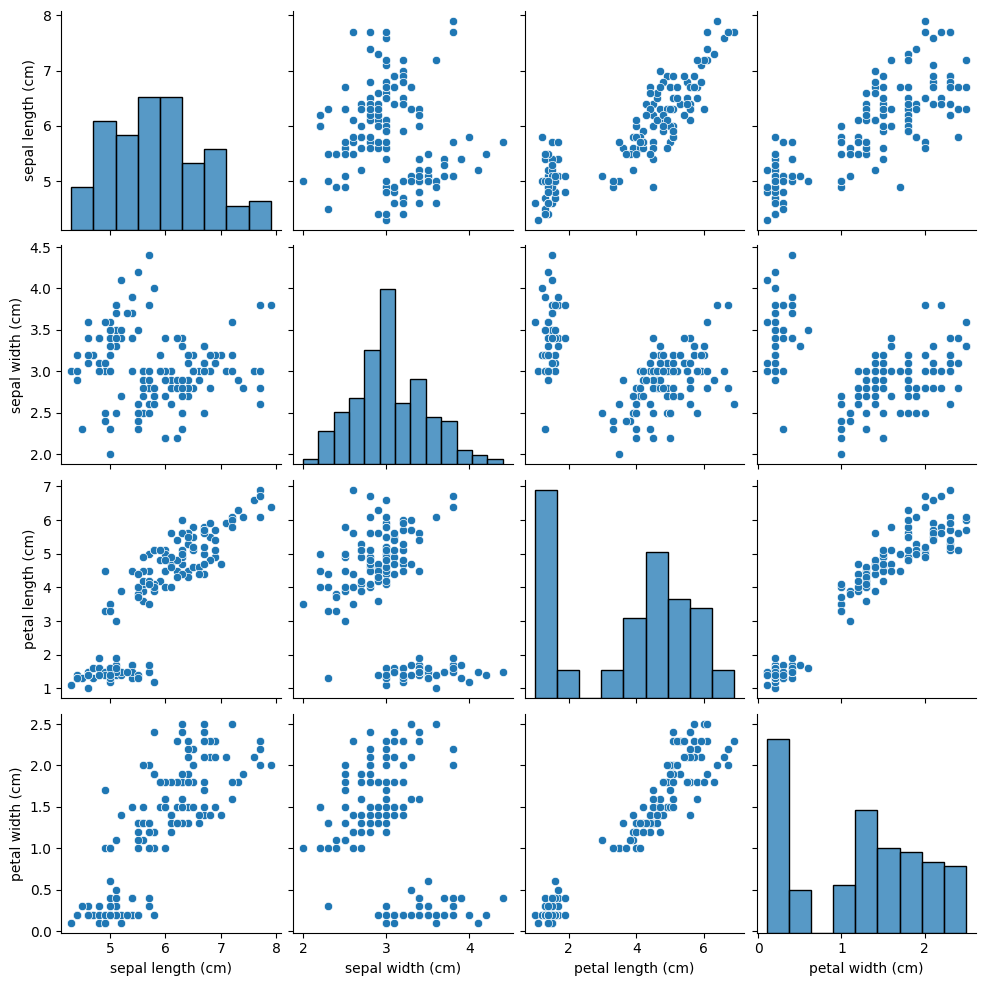

In [43]:
sns.pairplot(iris_df)

In [8]:
scaler = StandardScaler()
iris_standardized = pd.DataFrame(data = scaler.fit_transform(iris['data']), columns = iris['feature_names'])


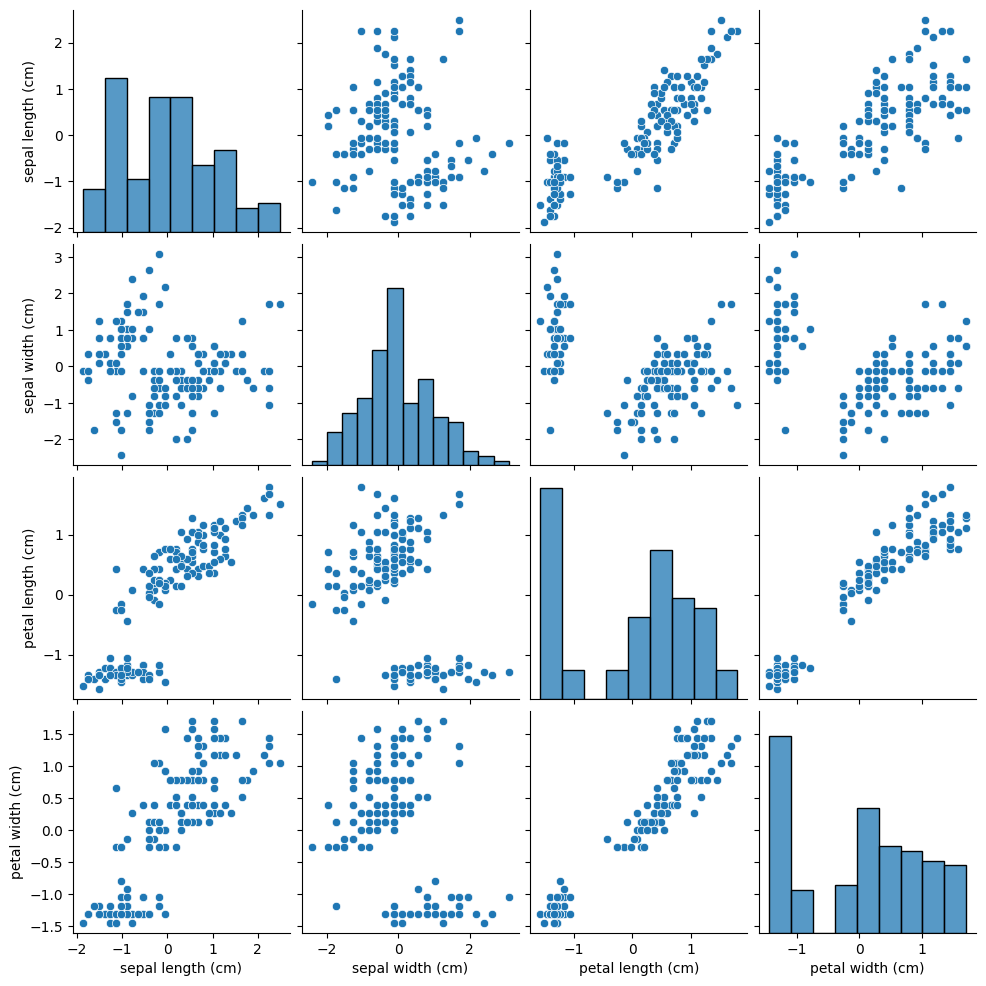

In [45]:
sns.pairplot(iris_standardized)

In [11]:
from convexlocalisometry.transformation import exponential_transformation
from convexlocalisometry.loss import isometry_loss
from convexlocalisometry.algorithm import greedy, brute, group_basis_pursuit, group_lasso
from einops import rearrange
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# brute(wine_standardized.transpose().to_numpy(), isometry_loss,D_wine) # plainly this is too hard 178**13 combinations

In [55]:
brute(iris_standardized.transpose().to_numpy(), isometry_loss, D_iris) # plainly this is too hard 178**13 combinations

Computing brute force solution for dictionary dimension 150 and target_dimension 4


0it [00:00, ?it/s]/Users/samsonkoelle/convexlocalisometry/convexlocalisometry/loss.py:14: RuntimeWarning: overflow encountered in exp
  (np.exp(singular_values) + np.exp(singular_values ** (-1))) / (2 * np.e)
/Users/samsonkoelle/convexlocalisometry/convexlocalisometry/loss.py:14: RuntimeWarning: divide by zero encountered in reciprocal
  (np.exp(singular_values) + np.exp(singular_values ** (-1))) / (2 * np.e)
416166it [00:30, 13517.29it/s]
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f85c91aabf0>>
Traceback (most recent call last):
  File "/Users/samsonkoelle/miniconda3/envs/isometry/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


KeyboardInterrupt: 

In [45]:
output = greedy(iris_standardized.transpose().to_numpy(), isometry_loss, D_iris) # plainly this is too hard 178**13 combinations

target_dimension 4
[138]
target_dimension 4
[138, 67]
target_dimension 4
[138, 67, 65]
target_dimension 4
[138, 67, 65, 98]
target_dimension 4


In [56]:
150**4 / 15000 # 10 hours

33750.0

In [ ]:
# should we compute the rank of the data?  Yes probably for supplement.